In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, StratifiedShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier


In [6]:
heart_data = pd.read_csv('./input/heart-disease.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.shape

(303, 14)

In [9]:
heart_data.isnull().values.any()

False

In [10]:
heart_data['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

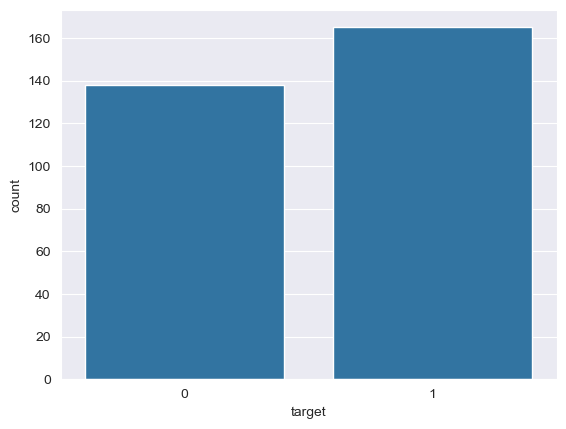

In [12]:
sns.countplot(x='target', data=heart_data)

In [13]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [36]:
heart_data.rename(columns = {'age':'Age','sex':'Gender','cp':'Chest_pain' ,'trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease','slope':'ST_slope'} , inplace = True)

all_features = heart_data.columns.copy()
print(all_features)

Index(['Age', 'Gender', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'Heart_disease'],
      dtype='object')


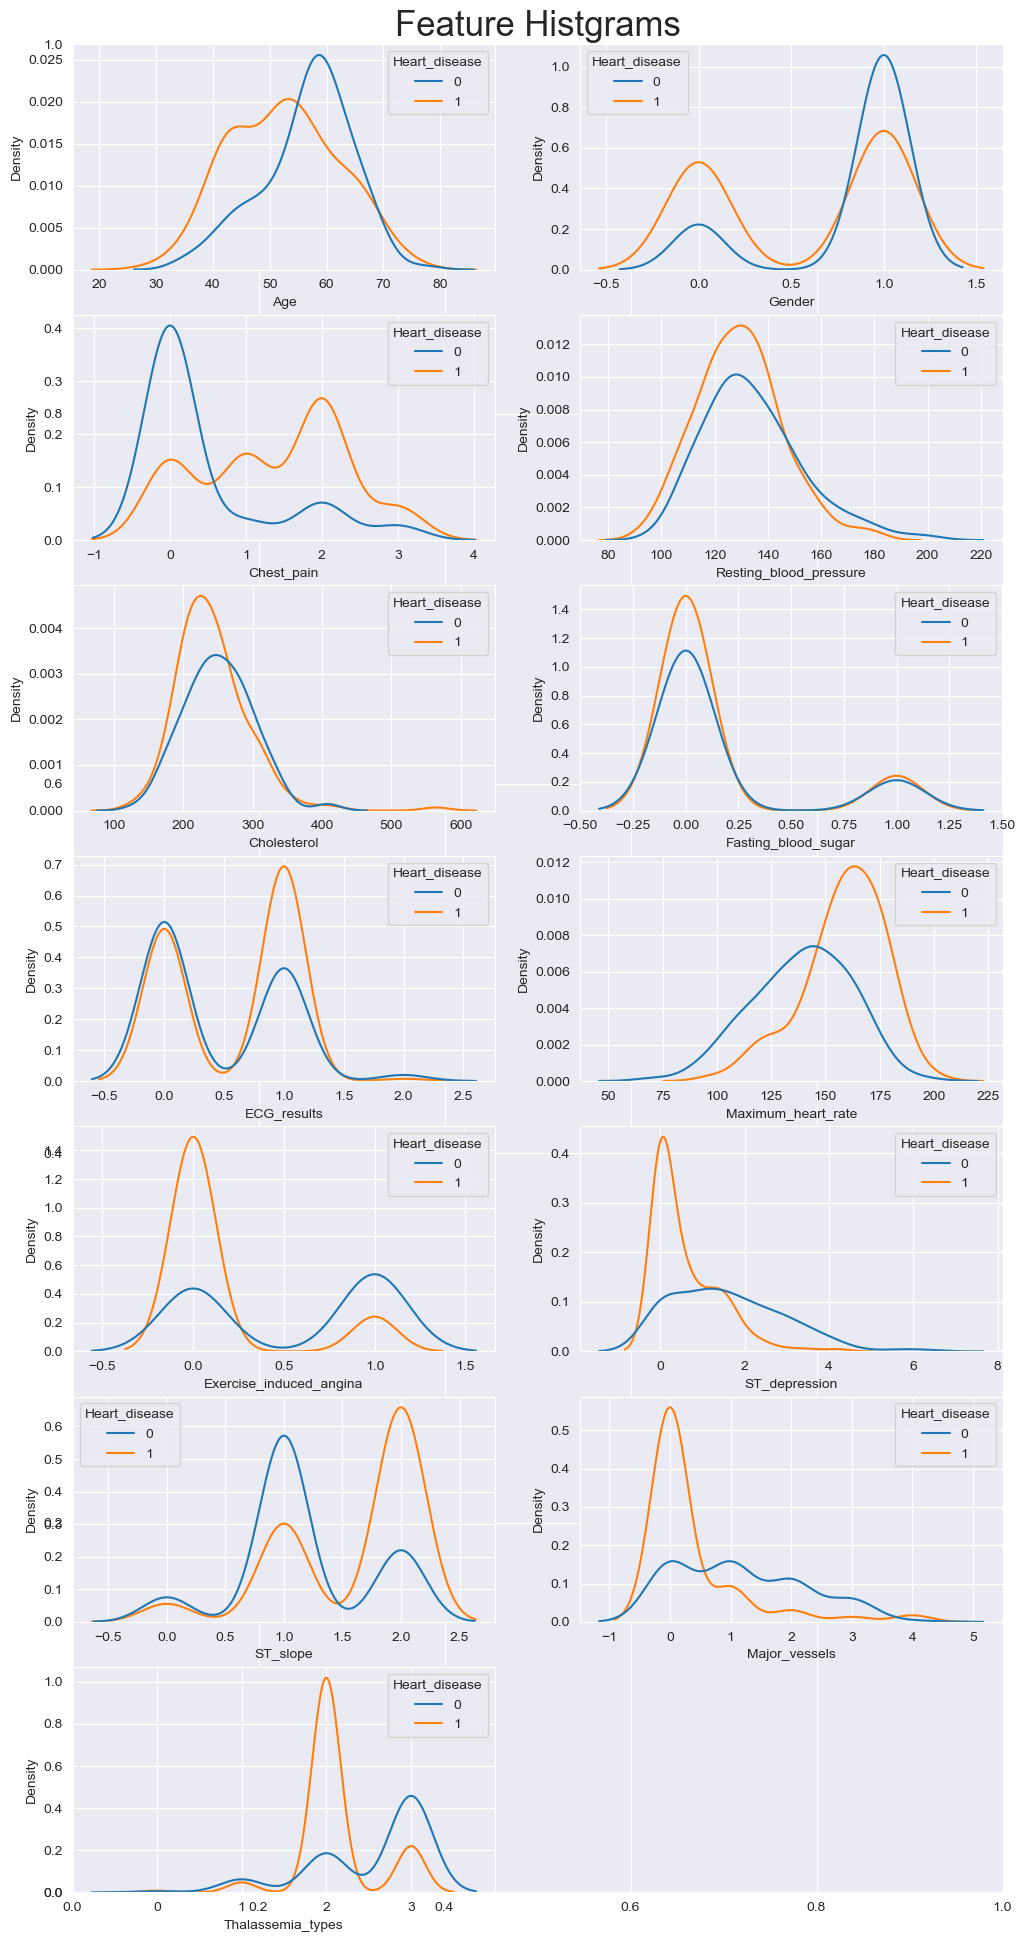

In [74]:
def plot_all_features_against_target(X,y):
    """
    Visualize all features distribution against the target in 2 columns 
    """
    n_columns=len(list(X.columns))
    n_plot_rows= (n_columns+1)//2
    plt.figure(figsize=(12,24))
    plt.title("Feature Histgrams", fontsize=25)
    index=1 
    for column in X.columns:
        plt.subplot(n_plot_rows, 2, index)
        sns.kdeplot(data=X, x=column, hue=y)
        #sns.histplot(data=X, x=column, hue=y, kde=False)
        index += 1
    return
Xplot = heart_data.copy()
yplot = Xplot.pop("Heart_disease")
plot_all_features_against_target(Xplot, yplot)

In [40]:
def plot_learning_curve(
        estimator, X, y, title="Learning Curve", cv=None,
        train_sizes=np.linspace(0.1, 1.0, 5)
):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Get learning curve data
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=-1,
                                                                         train_sizes=train_sizes, return_times=True)

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()

    # Plot training curve with filled error band
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

    # Plot testing curve with filled error band
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Plot training times
    plt.figure()
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Fit times (seconds)")
    plt.grid()
    plt.plot(train_sizes, fit_times.mean(axis=1), 'o-')
    plt.show()
    
    
def plot_validation_curve(estimator, X, y, param_name, param_range, scoring='accuracy', cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        scoring=scoring, cv=cv, n_jobs=-1
    )
    
    # Compute mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot validation curve
    plt.figure()
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")

    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [82]:
sc = StandardScaler()
Xplot = sc.fit_transform(Xplot)

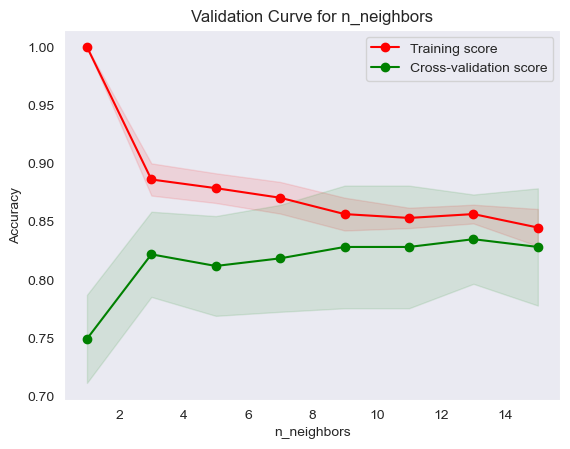

In [83]:
neigh=KNeighborsClassifier()
param_range_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
plot_validation_curve(
    estimator=neigh, X=Xplot, y=yplot, 
    param_name='n_neighbors', param_range=param_range_neighbors,
)

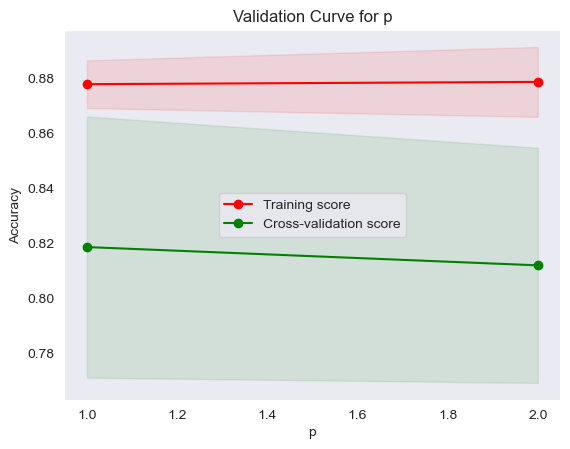

In [84]:
param_range_p = [1, 2]
plot_validation_curve(
    estimator=neigh, X=Xplot, y=yplot, 
    param_name='p', param_range=param_range_p,
)

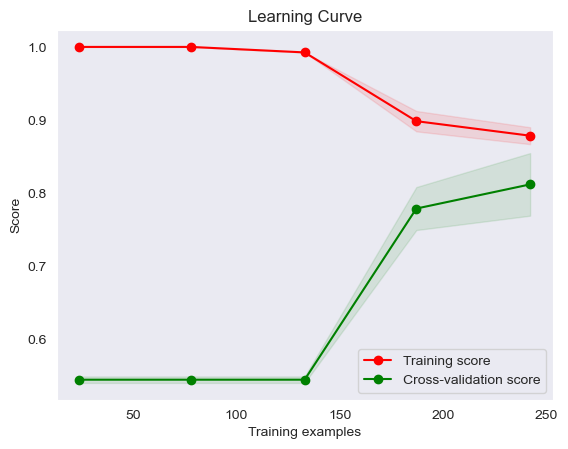

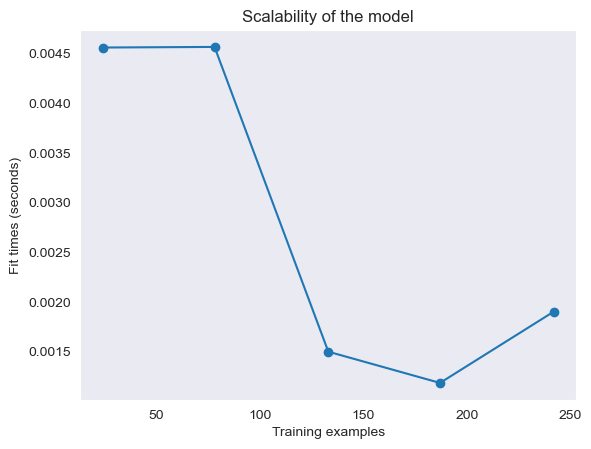

In [85]:
plot_learning_curve(neigh, Xplot, yplot, title="Learning Curve")

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(Xplot, yplot, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
neigh = KNeighborsClassifier(n_neighbors=13, p=2)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

In [89]:
neigh.score(X_test, Y_test)


0.8289473684210527

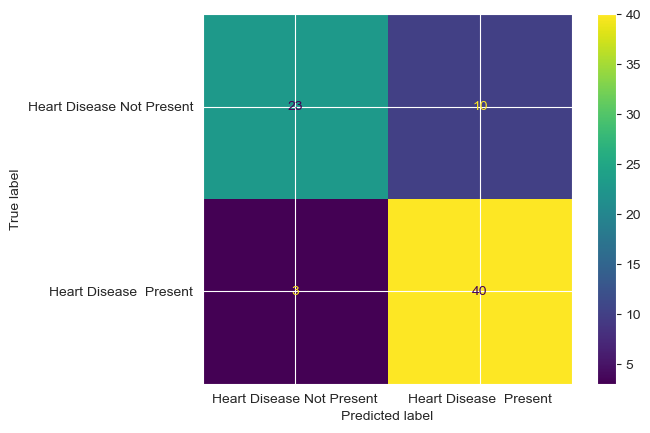

In [92]:
y_predict = neigh.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)

confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Heart Disease Not Present', 'Heart Disease  Present'))
confusion_matrix_display.plot()
plt.show()

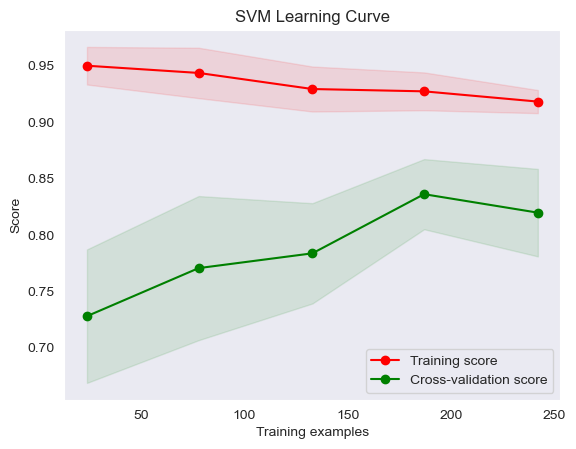

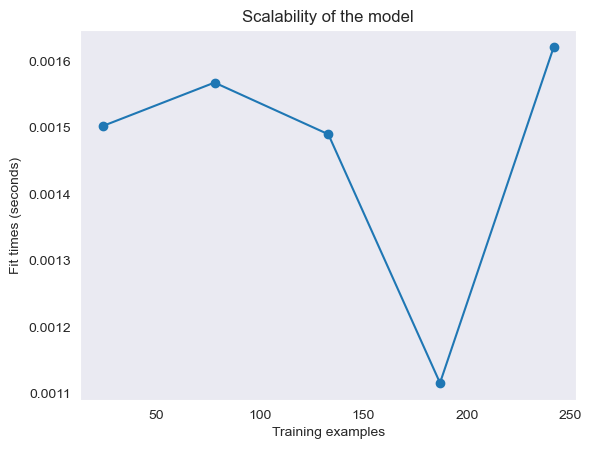

In [98]:
rbf_svc = svm.SVC(kernel='rbf')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(rbf_svc, Xplot, yplot, title="SVM Learning Curve", cv=cv)

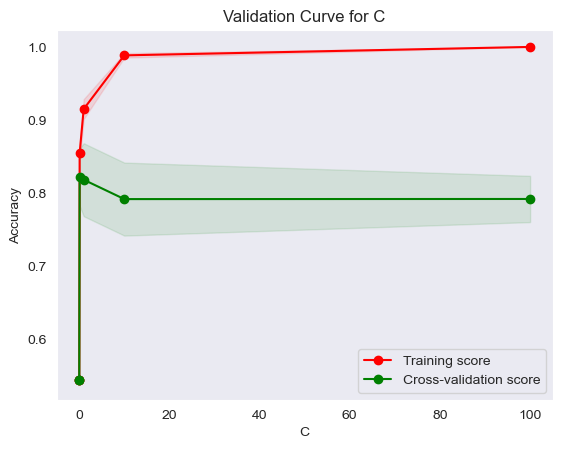

In [99]:
# Varying the regularization parameter (C)
param_range_C = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, Xplot, yplot, param_name="C", param_range=param_range_C)

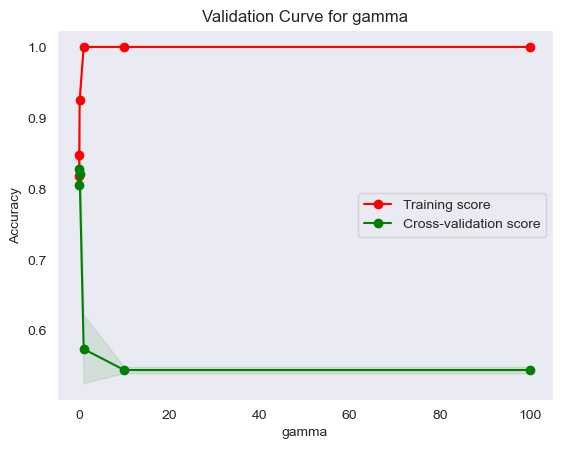

In [100]:
# Varying the gamma parameter for RBF kernel
param_range_gamma = np.logspace(-3, 2, 6)
plot_validation_curve(rbf_svc, Xplot, yplot, param_name="gamma", param_range=param_range_gamma)

In [102]:
rbf_svc.score(X_test, Y_test)

0.8552631578947368

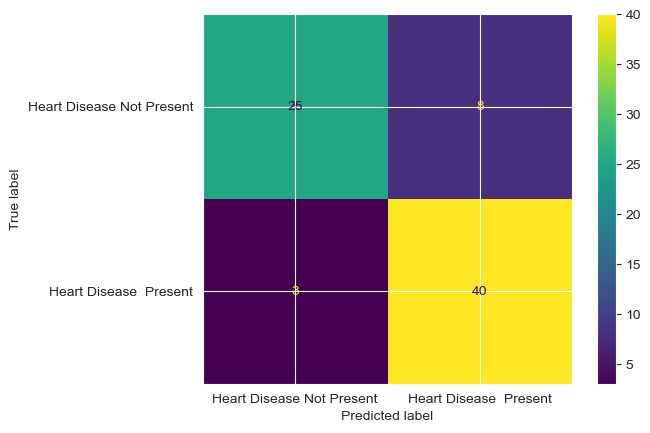

In [101]:
rbf_svc.fit(X_train, Y_train)
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Heart Disease Not Present', 'Heart Disease  Present'))
confusion_matrix_display.plot()
plt.show()

In [103]:
linear_svc = svm.SVC(kernel='linear')

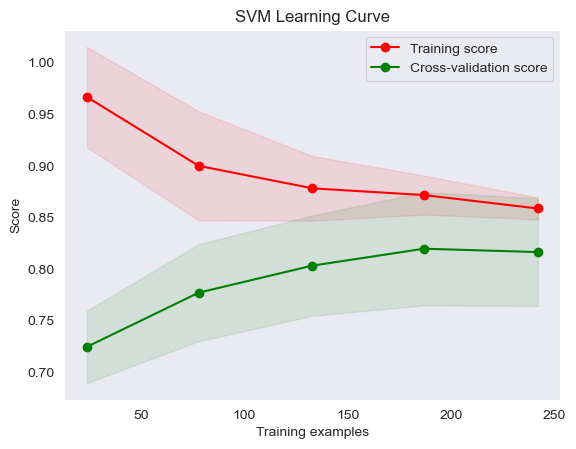

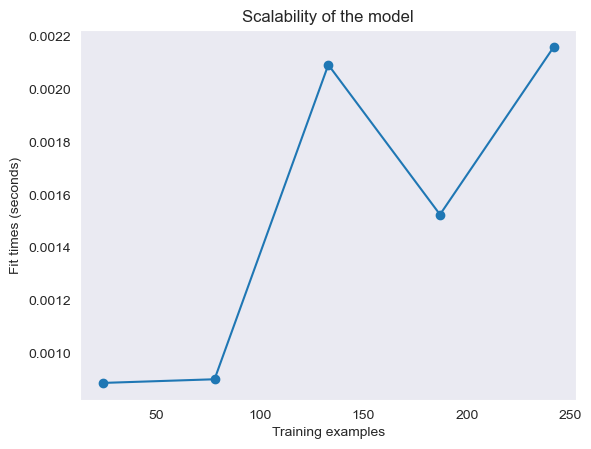

In [105]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(linear_svc, Xplot, yplot, title="SVM Learning Curve", cv=cv)


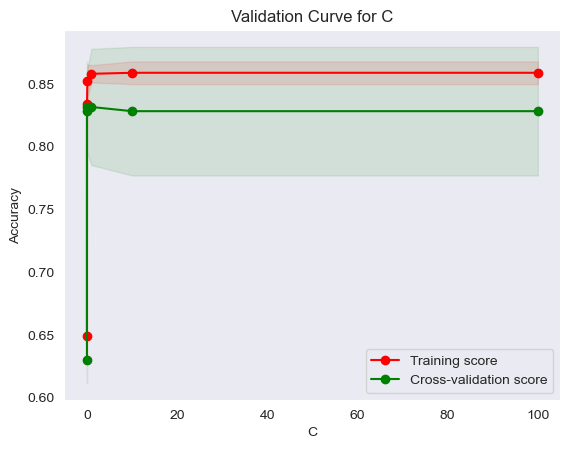

In [107]:
# Varying the C parameter
param_range_C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_validation_curve(linear_svc, Xplot, yplot, param_name="C", param_range=param_range_C)

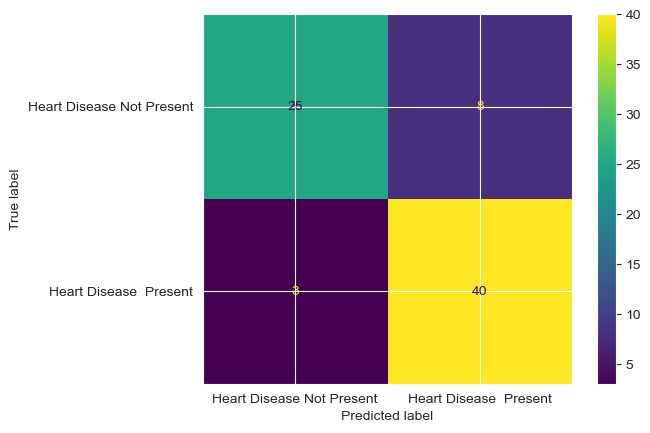

0.8552631578947368

In [108]:
linear_svc.fit(X_train, Y_train)
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Heart Disease Not Present', 'Heart Disease  Present'))
confusion_matrix_display.plot()
plt.show()
linear_svc.score(X_test, Y_test)

In [115]:

mlpc = MLPClassifier(max_iter=4000, random_state=42)



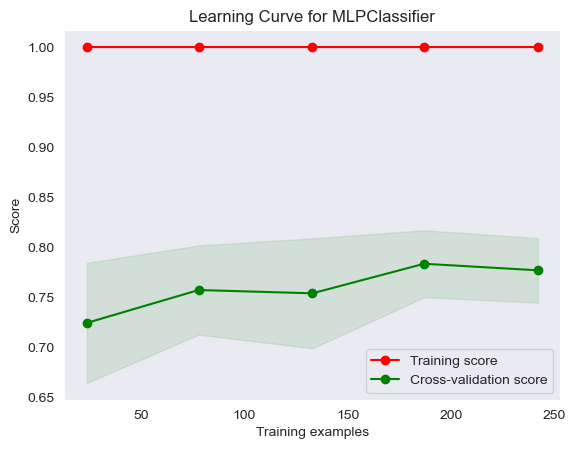

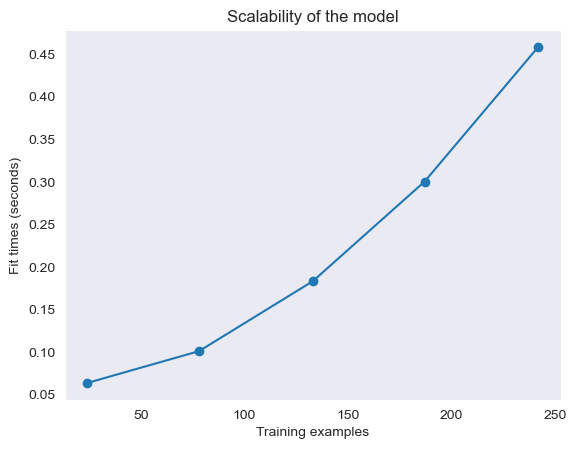

In [116]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(mlpc, Xplot, yplot, title="Learning Curve for MLPClassifier", cv=cv)


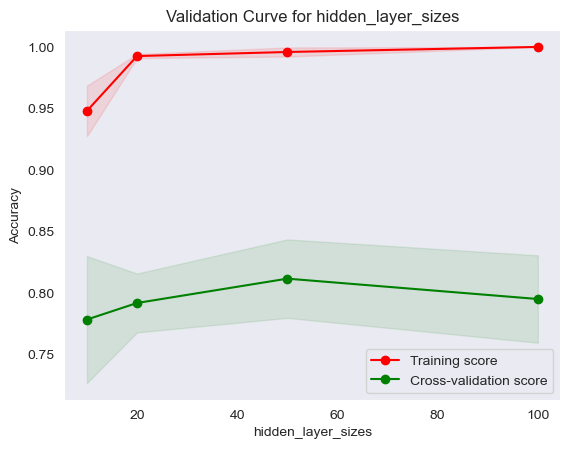

In [117]:

# Varying the number of hidden layers (neurons in the hidden layer)
param_range_hidden_layer_sizes = [10, 20, 50, 100]
plot_validation_curve(mlpc, Xplot, yplot, param_name="hidden_layer_sizes",
                      param_range=param_range_hidden_layer_sizes)

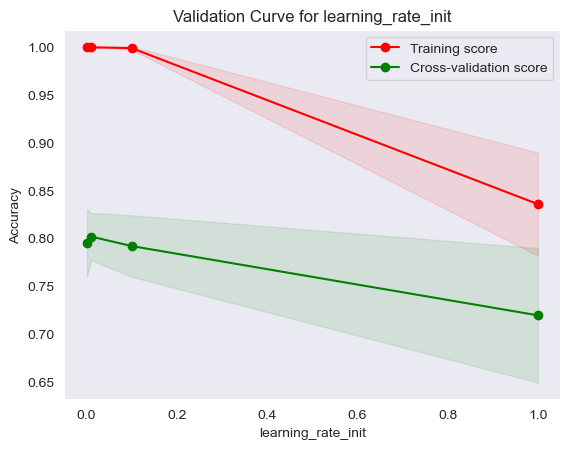

In [118]:
# Varying the learning rate
param_range_learning_rate = [0.001, 0.01, 0.1, 1.0]
mlp_learning_rate = MLPClassifier(max_iter=1000, random_state=42, hidden_layer_sizes=(100,))
plot_validation_curve(mlp_learning_rate, Xplot, yplot, param_name="learning_rate_init", param_range=param_range_learning_rate)

In [122]:
mlpc.fit(X_train, Y_train)
mlpc.score(X_test, Y_test)

0.8289473684210527

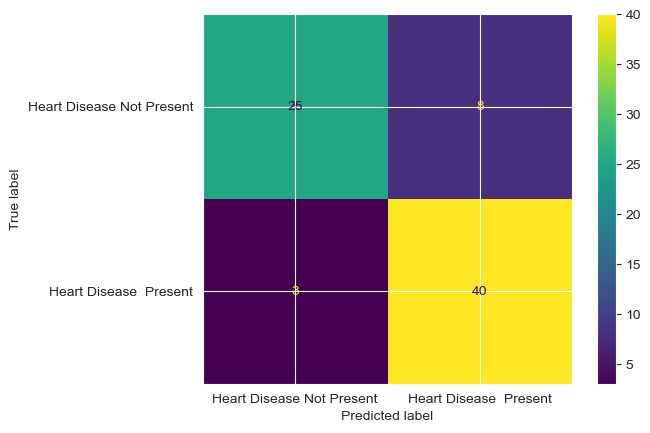

In [124]:
y_predict = rbf_svc.predict(X_test)
confusion_matrix_data = confusion_matrix(y_true=Y_test, y_pred=y_predict)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data, display_labels=('Heart Disease Not Present', 'Heart Disease  Present'))
confusion_matrix_display.plot()
plt.show()